# Introduction

Understanding systematic and statistical errors from the ABCD method is difficult. Currently, most analyses take several arbitrary control regions and use the worst of those control regions to determine the overal systematic error. We attempt to better understand how errors work in this work.

* We first show a simple run to become familiar with the standard method of error propagation used by most analyses.
* As we vary the area of the A plane, we show how the standard error propagation fairs as a function of the size of the region A.
* Look at how things work as a function of the number of events

The ABCD method is a two-variable background method. The two variables should be uncorrelated, and lay out a plane. A cut is made along each axis and that determines the regions A, B, C, and D. For this work, the layout of ABCD starts with A in the upper left, and then counts out region B in the upper right, C in the lower left, and D in the lower right. For this study it is assumed that the x and y variables are both 0 to 1.

# Configuration

We are using matplotlib to make plots. Allow them to appear inline.

In [1]:
%matplotlib inline

The code used to fill the ABCD plane is a small console program written in C#, which runs in parallel (to fill all your CPU's!), called ABCDTester. This is the relative location of the program that we can then run.

In [2]:
ABCDTesterPath="C:\\Users\\Gordon\\Documents\\Code\\ABCDStatTests\\ABCDTester\\bin\\Release\\ABCDTester.exe"

# Utilities

Make running the ABCDTester code easy from within this notebook

In [62]:
import os
import pandas as pd
def abcd_run(nevents = 100000, ntrials=20000, x_cut = 0.5, y_cut = 0.5, min_error = 0.005):
    if min_error > 0.0:
        stop_condition = "--MinError %f" % min_error
    else:
        stop_condition = "--NEvents %d" % nevents
    cmd = '%s --NTrials %d --XCut %f --YCut %f %s > run.txt' % (ABCDTesterPath, ntrials, x_cut, y_cut, stop_condition)
    if os.system(cmd) != 0:
        raise RuntimeError ("Unable to run %s" % cmd)
    v = pd.read_csv("run.txt")
    os.unlink("run.txt")
    return v

We will be doing a bunch of Gaussian fitting, so make it easy (return A (normalization), mu (average), and sigma (width)

In [63]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy

def gauss(x, A, mu, sigma):
    # Fit function
    #A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

def fitGaus(data, plot = True):
    # First, bin the data
    hist, bin_edges = numpy.histogram(data, density = False, bins='auto')
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

    p0 = [1., data.mean(), 100.]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
    
    # Plot both the data and the curve
    if plot:
        hist_fit = gauss(bin_centers, *coeff)
        plt.plot(bin_centers, hist, label='Test data')
        plt.plot(bin_centers, hist_fit, label='Fitted data')
        plt.show()

    return coeff

# Simple Single Run

Run 10K trials with 100K events, with a cut in the middle so we can explore the output of the program

In [5]:
simple = abcd_run(ntrials = 20000, x_cut = 0.5, y_cut = 0.5)

In [6]:
simple

,A,B,C,D,CalcA,CalcA StdDev
0,25046,24877,25104,24973,25007.496416,274.029345
1,24915,25025,25227,24833,25422.046269,278.332638
2,24671,24822,25141,25366,24601.825357,268.920973
3,24956,24886,25208,24950,25143.338196,275.354961
4,25130,24916,25055,24899,25072.106510,274.890582
5,25251,24971,24921,24857,25035.293519,274.708445
6,25534,24860,24853,24753,24960.432271,274.407001
7,25009,24982,25066,24943,25105.192318,275.030684
8,25159,24715,24974,25152,24540.092637,269.115624
9,25006,25155,25043,24796,25405.576101,278.320297


Since the event placement is done by a flat random number generator, we should expect a gaussian with with sqrt(N) for regions A...D. Lets look just at A.

In [7]:
simple.mean()

A               25000.683750
B               25000.068800
C               25000.548300
D               24998.699150
CalcA           25002.932545
CalcA StdDev      273.898216
dtype: float64

Note that the calculated A is the same as A itself on average. The StdDev column is the simple statistical error propagation of the relation BC/D (assuming all errors are sqrt(N) and guassian).

In [8]:
simple.std()

A               137.299170
B               137.501372
C               136.098949
D               137.768054
CalcA           263.069081
CalcA StdDev      2.850618
dtype: float64

In [9]:
import math
math.sqrt(simple.mean()['A'])

158.1160452009852

I do not understand why these are different.

Histogram and fit these

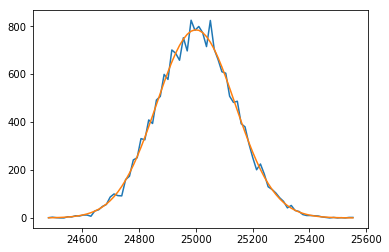

array([   785.17273383,  25000.42068838,   -138.00284644])

In [10]:
fitGaus(simple['A'])

Look at the difference between A and the calculated A.

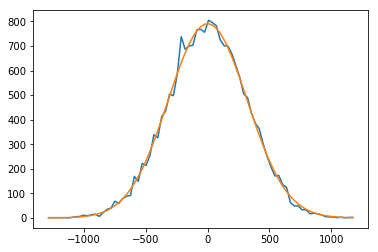

array([  7.91029302e+02,   4.77259642e-01,  -3.18890015e+02])

In [11]:
fitGaus(simple['A']-simple['CalcA'])

The 311 width here should be compared to the mean of the calculated standard deveation above (273 when I ran this). Do not know what is at the root of the discrepancy here.

# Behavior as a function of size of A

The above was for a single cut point, at 0.5 and 0.5. Now, lets look at the size of the error and the difference in the side of the error as a function of the cut point.

First job is to define a function that will return the basic information for each run: the number in A, the calculated number in A, as a function of the a x,y cut

In [65]:
def calcErrorForXYCut(x_cut = 0.5, y_cut = 0.5, ntrials = 10000, min_error = 0.005, nevents = 1000):
    v = abcd_run(ntrials = ntrials, x_cut = x_cut, y_cut = y_cut, nevents = nevents, min_error = min_error)
    fitDataCalcA = fitGaus(v['CalcA'], plot = False)
    return (v['A'].mean(), v['CalcA StdDev'].mean(), abs(fitDataCalcA[2]))

How many trials should we use in order to get a decent understanding of the error? First, get the propagated error and the fit width as a function of the # of trials we use.

In [43]:
from itertools import chain
trial_series = [e for e in chain(range(50, 100, 10), range(100, 500, 100), range(500, 10001, 500))]
abcd_ntrials = [calcErrorForXYCut(ntrials = i) for i in trial_series]

(0, 700)

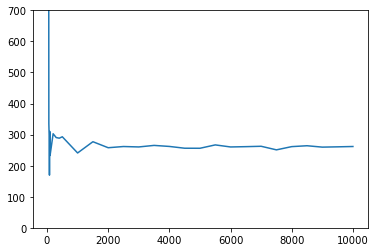

In [54]:
plt.plot(list(trial_series),[l[2] for l in abcd_ntrials])
plt.ylim(0,700)

Tells you we should stick around 1,000 trials - and the system has noise of about 20 counts or so. Which is... odd. Lets look at the same thing for the propagated error.

(0, 300)

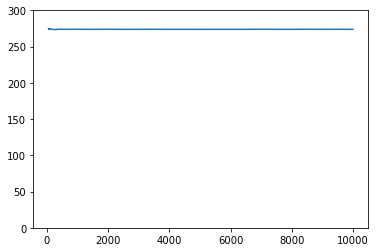

In [53]:
plt.plot(trial_series, [l[1] for l in abcd_ntrials])
plt.ylim(0,300)

In [ ]:
plt.plot(trial_series,errors)

The propagated error is rock solid from the get-go - no matter the number of trials. So we can see 1000 is probably enough for most runs!

Lets look at the behavior of the errors as a function of the x/y cut when they are run together.

In [16]:
cut_values = range(1, 20)
abcd_at_cuts = [calcErrorForXYCut(x_cut = c*0.05, y_cut = c*0.05, ntrials=1000) for c in cut_values]

(0, 320)

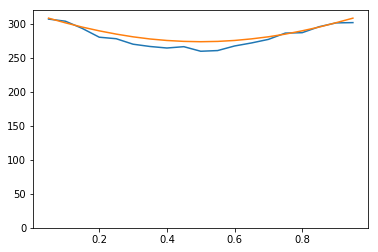

In [60]:
plt.plot([i*0.05 for i in cut_values], [v[2] for v in abcd_at_cuts])
plt.plot([i*0.05 for i in cut_values], [v[1] for v in abcd_at_cuts])
plt.ylim(0,320)

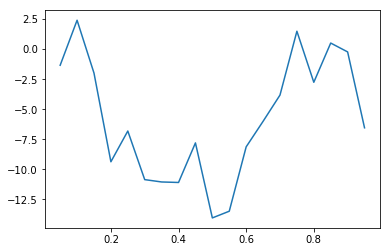

In [61]:
plt.plot([i*0.05 for i in cut_values], [v[2]-v[1] for v in abcd_at_cuts])

There is no real difference as a function fo the ABCD cut value. This is good - so we can use standard error propagation and trust that it gets it right. Also tells you a bit about how much of a difference this makes.

# Looking at small numbers of events

Given all distributions are flat, how do things look as we decrease the total number of events in the ABCD plane?

Plot the fractional error (error/events).

In [68]:
event_range = [i for i in chain(range(500, 1000, 200), range(1000, 10000, 1000), range (10000, 20000, 2000))]
abcd_at_events_05 = [calcErrorForXYCut(x_cut = 0.5, y_cut = 0.5, ntrials=1000, min_error = -1.0, nevents=e) for e in event_range]

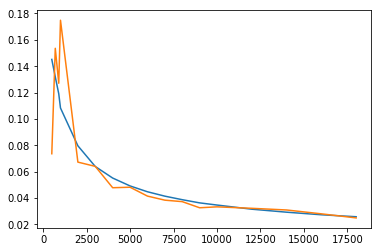

In [72]:
plt.plot(event_range, [l[1]/l[0] for l in abcd_at_events_05])
plt.plot(event_range, [l[2]/l[0] for l in abcd_at_events_05])

In [77]:
event_range = [i for i in chain(range(5000, 10000, 1000), range (10000, 20000, 2000))]
abcd_at_events_005 = [calcErrorForXYCut(x_cut = 0.05, y_cut = 0.05, ntrials=1000, min_error = -1.0, nevents=e) for e in event_range]

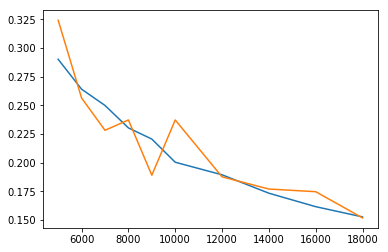

In [78]:
plt.plot(event_range, [l[1]/l[0] for l in abcd_at_events_005])
plt.plot(event_range, [l[2]/l[0] for l in abcd_at_events_005])

(0, 900)

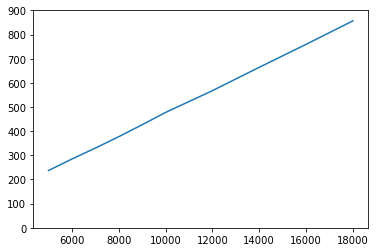

In [80]:
plt.plot(event_range, [l[0] for l in abcd_at_events_005])
plt.ylim(0,900)

Lets re-run the above with 3000 trials - just to see how much is a function of trials and how much is a function of the number of events.

In [89]:
event_range = [i for i in chain(range(1000, 10000, 1000), range (10000, 20000, 2000))]
abcd_at_events_005_x3 = [calcErrorForXYCut(x_cut = 0.05, y_cut = 0.05, ntrials=1000, min_error = -1.0, nevents=e) for e in event_range]

TypeError: Could not convert  29.8386871076718 20.3218590035648 20.3218590035648 20.3218590035648 14.5756900404894 15.7060071170418 14.5756900404894 29.8386871076718 29.8386871076718 20.3218590035648 14.5756900404894 20.3218590035648 20.3218590035648 20.3218590035648 14.5756900404894 20.3218590035648 20.3218590035648 20.3218590035648 14.5756900404894 20.3218590035648 20.3218590035648 20.3218590035648 14.5756900404894 20.3218590035648 20.3218590035648 20.3218590035648 29.8386871076718 14.5756900404894 20.3218590035648 20.3218590035648 20.3218590035648 20.3218590035648 14.5756900404894 20.3218590035648 20.3218590035648 20.3218590035648 20.3218590035648 46.0400640746731 20.3218590035648 14.5756900404894 20.3218590035648 20.3218590035648 46.0400640746731 20.3218590035648 14.5756900404894 14.5756900404894 20.3218590035648 46.0400640746731 14.5756900404894 14.5756900404894 14.5756900404894 20.3218590035648 46.0400640746731 14.5756900404894 14.5756900404894 14.5756900404894 20.3218590035648 46.0400640746731 14.5756900404894 14.5756900404894 14.5756900404894 14.5756900404894 46.0400640746731 14.5756900404894 14.5756900404894 14.5756900404894 14.5756900404894 46.0400640746731 14.5756900404894 14.5756900404894 14.5756900404894 14.5756900404894 46.0400640746731 14.5756900404894 14.5756900404894 14.5756900404894 14.5756900404894 46.0400640746731 14.5756900404894 46.0400640746731 46.0400640746731 14.5756900404894 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 14.5756900404894 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 14.5756900404894 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 14.5756900404894 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 14.5756900404894 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 46.0400640746731 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 46.0400640746731 19.4696088675831 46.0400640746731 46.0400640746731 46.0400640746731 46.0400640746731 19.4696088675831 46.0400640746731 19.4696088675831 19.4696088675831 46.0400640746731 32.5907680076072 19.4696088675831 19.4696088675831 19.4696088675831 46.0400640746731 32.5907680076072 19.4696088675831 19.4696088675831 19.4696088675831 46.0400640746731 32.5907680076072 19.4696088675831 19.4696088675831 19.4696088675831 46.0400640746731 32.5907680076072 19.4696088675831 19.4696088675831 19.4696088675831 46.0400640746731 32.5907680076072 19.4696088675831 19.4696088675831 19.4696088675831 46.0400640746731 32.5907680076072 19.4696088675831 19.4696088675831 19.4696088675831 19.4696088675831 32.5907680076072 19.4696088675831 32.5907680076072 19.4696088675831 19.4696088675831 32.5907680076072 19.4696088675831 32.5907680076072 32.5907680076072 19.4696088675831 32.5907680076072 32.5907680076072 32.5907680076072 32.5907680076072 19.4696088675831 30.9517481903298 32.5907680076072 32.5907680076072 32.5907680076072 19.4696088675831 30.9517481903298 32.5907680076072 32.5907680076072 32.5907680076072 32.5907680076072 30.9517481903298 32.5907680076072 32.5907680076072 32.5907680076072 32.5907680076072 30.9517481903298 32.5907680076072 32.5907680076072 32.5907680076072 32.5907680076072 30.9517481903298 32.5907680076072 32.5907680076072 32.5907680076072 32.5907680076072 30.9517481903298 32.5907680076072 30.9517481903298 30.9517481903298 32.5907680076072 30.9517481903298 32.5907680076072 30.9517481903298 30.9517481903298 32.5907680076072 30.9517481903298 30.9517481903298 30.9517481903298 30.9517481903298 32.5907680076072 30.8171687251807 30.9517481903298 30.9517481903298 30.9517481903298 32.5907680076072 30.8171687251807 30.9517481903298 30.9517481903298 30.9517481903298 30.9517481903298 30.8171687251807 30.9517481903298 30.9517481903298 30.9517481903298 30.9517481903298 30.8171687251807 30.9517481903298 30.9517481903298 30.9517481903298 30.9517481903298 30.8171687251807 30.9517481903298 30.9517481903298 30.9517481903298 30.9517481903298 30.8171687251807 30.9517481903298 30.8171687251807 30.8171687251807 30.9517481903298 30.8171687251807 30.8171687251807 30.8171687251807 30.8171687251807 30.9517481903298 30.8171687251807 30.8171687251807 30.8171687251807 30.8171687251807 30.9517481903298 30.8171687251807 30.8171687251807 30.8171687251807 30.8171687251807 30.9517481903298 22.6162213682041 30.8171687251807 30.8171687251807 30.8171687251807 30.9517481903298 22.6162213682041 30.8171687251807 30.8171687251807 30.8171687251807 30.8171687251807 22.6162213682041 30.8171687251807 30.8171687251807 30.8171687251807 30.8171687251807 22.6162213682041 30.8171687251807 30.8171687251807 30.8171687251807 30.8171687251807 22.6162213682041 30.8171687251807 22.6162213682041 22.6162213682041 30.8171687251807 22.6162213682041 22.6162213682041 22.6162213682041 22.6162213682041 30.8171687251807 22.6162213682041 22.6162213682041 22.6162213682041 22.6162213682041 30.8171687251807 22.6162213682041 22.6162213682041 22.6162213682041 22.6162213682041 30.8171687251807 18.4608442183533 22.6162213682041 22.6162213682041 22.6162213682041 30.8171687251807 18.4608442183533 22.6162213682041 22.6162213682041 22.6162213682041 30.8171687251807 18.4608442183533 22.6162213682041 22.6162213682041 22.6162213682041 22.6162213682041 18.4608442183533 22.6162213682041 18.4608442183533 22.6162213682041 22.6162213682041 18.4608442183533 18.4608442183533 18.4608442183533 18.4608442183533 22.6162213682041 18.4608442183533 18.4608442183533 18.4608442183533 18.4608442183533 22.6162213682041 18.4608442183533 18.4608442183533 18.4608442183533 18.4608442183533 22.6162213682041 18.4608442183533 18.4608442183533 18.4608442183533 18.4608442183533 22.6162213682041 20.1171021614784 18.4608442183533 18.4608442183533 18.4608442183533 22.6162213682041 20.1171021614784 18.4608442183533 18.4608442183533 18.4608442183533 22.6162213682041 20.1171021614784 18.4608442183533 18.4608442183533 18.4608442183533 18.4608442183533 20.1171021614784 18.4608442183533 20.1171021614784 20.1171021614784 18.4608442183533 20.1171021614784 20.1171021614784 20.1171021614784 20.1171021614784 18.4608442183533 20.1171021614784 20.1171021614784 20.1171021614784 20.1171021614784 18.4608442183533 20.1171021614784 20.1171021614784 20.1171021614784 20.1171021614784 18.4608442183533 20.1171021614784 20.1171021614784 20.1171021614784 20.1171021614784 18.4608442183533 21.5365706913355 20.1171021614784 20.1171021614784 20.1171021614784 18.4608442183533 21.5365706913355 20.1171021614784 20.1171021614784 20.1171021614784 18.4608442183533 21.5365706913355 20.1171021614784 29.8386871076718 21.5365706913355 20.1171021614784 18.4608442183533 21.5365706913355 21.5365706913355 19.4696088675831 21.5365706913355 21.5365706913355 20.1171021614784 21.5365706913355 21.5365706913355 19.4696088675831 21.5365706913355 21.5365706913355 21.5365706913355 21.5365706913355 21.5365706913355 19.4696088675831 21.5365706913355 21.5365706913355 21.5365706913355 21.5365706913355 21.5365706913355 19.4696088675831 21.5365706913355 21.5365706913355 21.5365706913355 21.5365706913355 21.5365706913355 23.1555379091063 21.5365706913355 21.5365706913355 21.5365706913355 37.8217528943332 21.5365706913355 23.1555379091063 21.5365706913355 21.5365706913355 37.8217528943332 37.8217528943332 21.5365706913355 26.6462121259244 21.5365706913355 21.5365706913355 37.8217528943332 37.8217528943332 37.8217528943332 26.6462121259244 37.8217528943332 21.5365706913355 37.8217528943332 37.8217528943332 37.8217528943332 26.6462121259244 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 26.6462121259244 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 26.6462121259244 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 26.6462121259244 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 37.8217528943332 26.6462121259244 37.8217528943332 37.8217528943332 37.8217528943332 NaN 37.8217528943332 26.6462121259244 37.8217528943332 37.8217528943332 NaN NaN 37.8217528943332 49.8454975912619 37.8217528943332 37.8217528943332 NaN NaN NaN 49.8454975912619 NaN NaN NaN NaN NaN 49.8454975912619 NaN NaN NaN NaN NaN 49.8454975912619 NaN NaN NaN NaN NaN 49.8454975912619 NaN NaN NaN NaN NaN 49.8454975912619 NaN NaN NaN NaN NaN 49.8454975912619 NaN NaN NaN 31.9350370596309 NaN 49.8454975912619 NaN NaN NaN 31.9350370596309 NaN 38.9811152194239 NaN 29.8386871076718 NaN 31.9350370596309 31.9350370596309 31.9350370596309 38.9811152194239 31.9350370596309 20.3218590035648 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 38.9811152194239 31.9350370596309 20.3218590035648 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 38.9811152194239 31.9350370596309 14.5756900404894 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 38.9811152194239 31.9350370596309 14.5756900404894 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 14.5756900404894 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 14.5756900404894 31.9350370596309 31.9350370596309 41.7322767717529 31.9350370596309 31.9350370596309 14.5756900404894 31.9350370596309 31.9350370596309 41.7322767717529 31.9350370596309 41.7322767717529 14.5756900404894 31.9350370596309 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 14.5756900404894 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 14.5756900404894 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 46.0400640746731 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 46.0400640746731 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 46.0400640746731 41.7322767717529 41.7322767717529 37.268961509311 41.7322767717529 41.7322767717529 46.0400640746731 41.7322767717529 41.7322767717529 37.268961509311 41.7322767717529 41.7322767717529 46.0400640746731 41.7322767717529 37.268961509311 37.268961509311 37.268961509311 37.268961509311 46.0400640746731 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 46.0400640746731 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 19.4696088675831 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 19.4696088675831 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 19.4696088675831 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 19.4696088675831 37.268961509311 37.268961509311 40.4191841767624 37.268961509311 37.268961509311 32.5907680076072 37.268961509311 37.268961509311 40.4191841767624 37.268961509311 37.268961509311 32.5907680076072 37.268961509311 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 32.5907680076072 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 32.5907680076072 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 32.5907680076072 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 32.5907680076072 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 32.5907680076072 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 30.9517481903298 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 40.4191841767624 30.9517481903298 40.4191841767624 40.4191841767624 29.9701415085678 40.4191841767624 29.9701415085678 30.9517481903298 40.4191841767624 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.9517481903298 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.9517481903298 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.9517481903298 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.9517481903298 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.8171687251807 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.8171687251807 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 29.9701415085678 30.8171687251807 29.9701415085678 29.9701415085678 23.1555379091063 29.9701415085678 23.1555379091063 30.8171687251807 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 30.8171687251807 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 30.8171687251807 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 30.8171687251807 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 30.8171687251807 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 22.6162213682041 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 22.6162213682041 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 23.1555379091063 22.6162213682041 23.1555379091063 26.6462121259244 23.1555379091063 23.1555379091063 26.6462121259244 22.6162213682041 26.6462121259244 26.6462121259244 26.6462121259244 23.1555379091063 26.6462121259244 22.6162213682041 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 22.6162213682041 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 22.6162213682041 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 18.4608442183533 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 18.4608442183533 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 26.6462121259244 18.4608442183533 26.6462121259244 49.8454975912619 26.6462121259244 26.6462121259244 49.8454975912619 18.4608442183533 26.6462121259244 49.8454975912619 26.6462121259244 26.6462121259244 49.8454975912619 18.4608442183533 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 18.4608442183533 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 18.4608442183533 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 18.4608442183533 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 20.1171021614784 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 49.8454975912619 20.1171021614784 49.8454975912619 38.9811152194239 49.8454975912619 49.8454975912619 49.8454975912619 20.1171021614784 49.8454975912619 38.9811152194239 49.8454975912619 49.8454975912619 38.9811152194239 20.1171021614784 38.9811152194239 38.9811152194239 49.8454975912619 49.8454975912619 38.9811152194239 20.1171021614784 38.9811152194239 38.9811152194239 49.8454975912619 38.9811152194239 38.9811152194239 20.1171021614784 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 20.1171021614784 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 21.5365706913355 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 21.5365706913355 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 38.9811152194239 21.5365706913355 56.9123375045116 38.9811152194239 38.9811152194239 21.5365706913355 56.9123375045116 38.9811152194239 38.9811152194239 21.5365706913355 56.9123375045116 38.9811152194239 38.9811152194239 21.5365706913355 56.9123375045116 38.9811152194239 56.9123375045116 37.8217528943332 56.9123375045116 56.9123375045116 56.9123375045116 37.8217528943332 56.9123375045116 56.9123375045116 37.8217528943332 56.9123375045116 56.9123375045116 37.8217528943332 56.9123375045116 56.9123375045116 37.8217528943332 56.9123375045116 56.9123375045116 37.8217528943332 56.9123375045116 56.9123375045116 NaN 56.9123375045116 56.9123375045116 NaN NaN 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 31.9350370596309 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 41.7322767717529 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 37.268961509311 40.4191841767624 40.4191841767624 56.9123375045116 56.9123375045116 56.9123375045116 14.9310861404431 15.7060071170418 to numeric

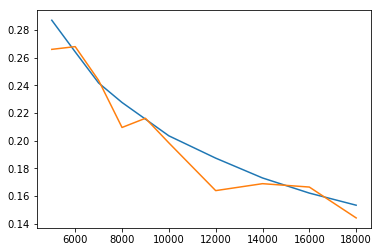

In [82]:
plt.plot(event_range, [l[1]/l[0] for l in abcd_at_events_005_x3])
plt.plot(event_range, [l[2]/l[0] for l in abcd_at_events_005_x3])

(0, 900)

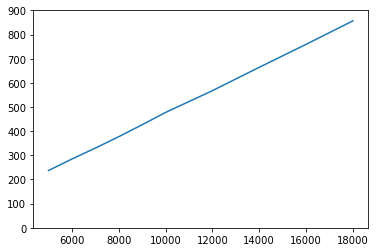

In [83]:
plt.plot(event_range, [l[0] for l in abcd_at_events_005])
plt.ylim(0,900)

In general, then, the gaussian follows the number of events. But note - we never go below 200 events. And I think that is definately the case in our analyses.